In [15]:
# Import Dependencies
import pandas as pd
import requests
import json
from datetime import datetime
import dateutil
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
   # Create a reference the CSV file desired
csv_path = "2018DCParkingData.csv"

# Read the CSV into a Pandas DataFrame
Parking2018 = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
Parking2018.head()


,Unnamed: 0,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,YEAR,MONTH,DAY,HOUR,MINUTE,DAY OF WEEK,NUMBERED DAY OF WEEK
0,0,-77.033642,38.901937,4204073,P039,PARK AT EXPIRED METER,900 BLOCK 15TH ST NW EAST SIDE,TN,800554,471.0,397082,137120,2018-04-02T10:44:00.000Z,2018,4,2,10,44,Monday,0
1,1,-77.075907,38.935698,4204074,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,3800 BLOCK NEWARK ST NW SOUTH SI*,MD,803108,2534.0,393419,140870,2018-04-02T12:11:00.000Z,2018,4,2,12,11,Monday,0
2,2,-77.034818,38.900766,4204075,P302,GOVERNMENT VEHICLE PARKING ONLY,800 BLOCK VERMONT AVE NW EAST S*,MD,812519,10761.0,396980,136990,2018-04-02T17:11:00.000Z,2018,4,2,17,11,Monday,0
3,3,-77.036547,38.900783,4204076,P002,STAND OR PARK IN ALLEY,800 BLOCK 16TH ST NW WEST SIDE,MD,813038,11213.0,396830,136992,2018-04-02T00:00:00.000Z,2018,4,2,0,0,Monday,0
4,4,-77.061715,38.943166,4204077,P014,EMERGENCY NO PARKING,2900 BLOCK VAN NESS ST NW NORTH *,DC,812163,10439.0,394650,141698,2018-04-02T10:40:00.000Z,2018,4,2,10,40,Monday,0


In [ ]:
# Parking2018 = Parking2018.drop(columns=["ROWID_","DAY_OF_WEEK",
#                           "BODY_STYLE","HOLIDAY",
#                           "WEEK_OF_YEAR","MONTH_OF_YEAR","ISSUE_TIME"])

# Parking2018.head()

In [ ]:
# date = Parking2018["TICKET_ISSUE_DATE"].tolist()
# date = [dateutil.parser.parse(day) for day in date]

# date

# days = [date[x].day for x in range(0,len(date))]
# years = [date[x].year for x in range(0,len(date))]
# months = [date[x].month for x in range(0,len(date))]
# hours = [date[x].hour for x in range(0,len(date))]
# weekday_name = [date[x].strftime('%A') for x in range(0,len(date))]
# weekday_number = [date[x].weekday() for x in range(0,len(date))]
# minutes = [date[x].minute for x in range(0,len(date))]

# Parking2018["YEAR"] = years
# Parking2018["MONTH"] = months
# Parking2018["DAY"] = days
# Parking2018["HOUR"] = hours
# Parking2018["MINUTE"] = minutes
# Parking2018["DAY OF WEEK"] = weekday_name
# Parking2018["NUMBERED DAY OF WEEK"] = weekday_number



# Parking2018.head()

In [8]:
grouped_hours = Parking2018[["OBJECTID","HOUR","MINUTE"]]

cleaned_hours = grouped_hours.drop(grouped_hours[(grouped_hours["HOUR"] == 0) & (grouped_hours["MINUTE"]==0)].index)
cleaned_hours = cleaned_hours.drop(columns = ["MINUTE"])
cleaned_hours = cleaned_hours.rename({"OBJECTID":"TICKETS ISSUED"},axis=1)
cleaned_hours = cleaned_hours.groupby(["HOUR"],as_index=False).count()
cleaned_hours




,HOUR,TICKETS ISSUED
0,0,6236
1,1,17141
2,2,9075
3,10,115581
4,11,116462
5,12,124897
6,13,86641
7,14,60625
8,15,60837
9,16,113041


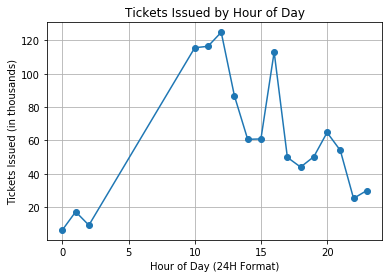

In [11]:
x = cleaned_hours["HOUR"]
tickets_hour = cleaned_hours["TICKETS ISSUED"]/1000
x_ticks = cleaned_hours["HOUR"]
plt.plot(x,tickets_hour,marker='o')
plt.grid()
plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("Hour of Day (24H Format)")
plt.title("Tickets Issued by Hour of Day")
plt.savefig("Output/tickets_by_hour_18.png")

In [5]:
weekday_data = Parking2018[["OBJECTID","DAY OF WEEK","NUMBERED DAY OF WEEK"]]
weekday_data = weekday_data.rename({"OBJECTID":"TICKETS ISSUED"},axis=1)
weekday_data = weekday_data.groupby(["DAY OF WEEK"],as_index=False).agg({"TICKETS ISSUED":'count',"NUMBERED DAY OF WEEK":'sum'})
weekday_data["NUMBERED DAY OF WEEK"] = weekday_data["NUMBERED DAY OF WEEK"]/weekday_data["TICKETS ISSUED"]
weekday_data = weekday_data.sort_values(by=["NUMBERED DAY OF WEEK"])
weekday_data





,DAY OF WEEK,TICKETS ISSUED,NUMBERED DAY OF WEEK
1,Monday,179157,0.0
5,Tuesday,241433,1.0
6,Wednesday,262788,2.0
4,Thursday,260931,3.0
0,Friday,219766,4.0
2,Saturday,115283,5.0
3,Sunday,26202,6.0


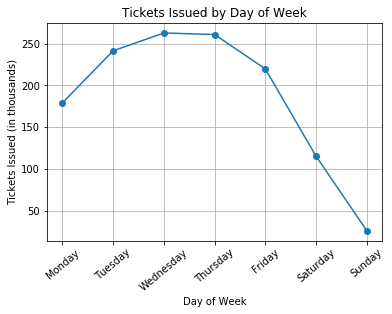

In [24]:
x = weekday_data["DAY OF WEEK"]
tickets_day = weekday_data["TICKETS ISSUED"]/1000
plt.plot(x,tickets_day,marker='o')
plt.grid()
plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("Day of Week")
plt.title("Tickets Issued by Day of Week")
plt.xticks(weekday_data["NUMBERED DAY OF WEEK"], weekday_data["DAY OF WEEK"], rotation=40)
plt.savefig("Output/tickets_by_dayofweek_18.png")

In [9]:
grouped_months = Parking2018[["OBJECTID","MONTH"]]

grouped_months = grouped_months.rename({"OBJECTID":"TICKETS ISSUED"},axis=1)
grouped_months = grouped_months.groupby(["MONTH"],as_index=False).count()
grouped_months




,MONTH,TICKETS ISSUED
0,1,97885
1,2,100604
2,3,118142
3,4,116921
4,5,119313
5,6,119277
6,7,111698
7,8,126103
8,9,98424
9,10,121556


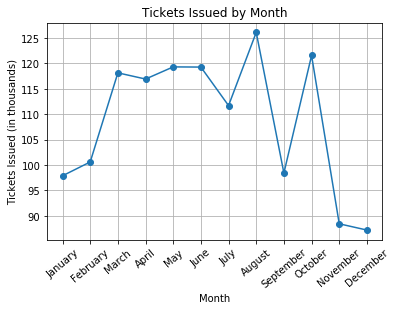

In [23]:
x = grouped_months["MONTH"]
tickets_hour = grouped_months["TICKETS ISSUED"]/1000
x_ticks = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.plot(x,tickets_hour,marker='o')
plt.grid()
plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("Month")
plt.title("Tickets Issued by Month")
plt.xticks(grouped_months["MONTH"], x_ticks, rotation=40)
plt.savefig("Output/tickets_by_month_18.png")
